(reglin_python_notebook)=
# Regressione lineare con Python

In [31]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.constants import golden


In [7]:
%matplotlib inline
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="colorblind",
    rc={"figure.figsize": (5.0, 5.0 / golden)},
)

SEED = 12345
rng = np.random.default_rng(SEED)

Esamineremo qui i dati riportati dall'antropologo {cite:t}`sahlins2013stone` che riguardano la produzione nelle società "primitive". In particolare Sahlins esamina la relazione tra produzione per lavoratore e proporzione di consumatori rispetto ai lavoratori nelle famiglie. I dati si riferiscono al villaggio di Mazulu, nell'Africa centrale. La variabile `acres` misura l'ampiezza dell'area coltivata da ciascuna famiglia; la variabile `consumers` indica il rapporto tra consumatori e individui attivi in ciascuna famiglia. I dati sono i seguenti.

In [34]:
consumers = np.array(
    [
        1.00,
        1.08,
        1.15,
        1.15,
        1.20,
        1.30,
        1.37,
        1.37,
        1.43,
        1.46,
        1.52,
        1.57,
        1.65,
        1.65,
        1.65,
        1.66,
        1.87,
        2.03,
        2.05,
        2.30,
    ]
)

acres = np.array(
    [
        1.71,
        1.52,
        1.29,
        3.09,
        2.21,
        2.26,
        2.40,
        2.10,
        1.96,
        2.09,
        2.02,
        1.31,
        2.17,
        2.28,
        2.41,
        2.23,
        3.04,
        2.06,
        2.73,
        2.36,
    ]
)

df = pd.DataFrame()
df["consumers"] = consumers
df["acres"] = acres
df.head()


,consumers,acres
0,1.00,1.71
1,1.08,1.52
2,1.15,1.29
3,1.15,3.09
4,1.20,2.21


In [36]:
df.describe().round(2)


,consumers,acres
count,20.00,20.00
mean,1.52,2.16
std,0.35,0.48
min,1.00,1.29
25%,1.27,2.00
50%,1.49,2.19
75%,1.65,2.37
max,2.30,3.09


Creo un diagramma a dispersione con `regplot()`.

<AxesSubplot: xlabel='consumers', ylabel='acres'>

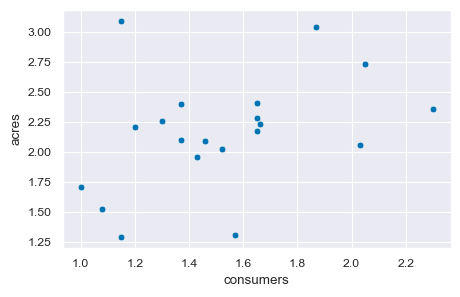

In [27]:
sns.scatterplot(x="consumers", y="acres", data=df)


Aggiungo la retta dei minimi quadrati.

<AxesSubplot: xlabel='consumers', ylabel='acres'>

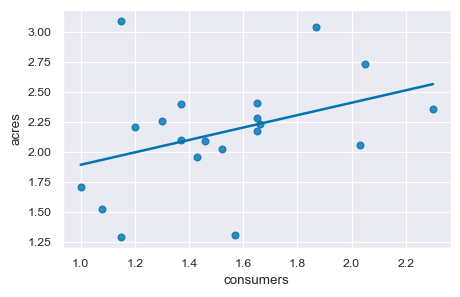

In [28]:
sns.regplot(x="consumers", y="acres", ci=None, data=df)


Trovo il coefficienti dei minimi quadrati con la funzione `ols`.

In [33]:
mod = smf.ols("acres ~ consumers", df).fit()
mod.params


Intercept    1.375645
consumers    0.516320
dtype: float64

Replico il risultato precedente usando le equazioni dei minimi quadrati. Inizio a trovare la matrice ci varianza-covarianza tra `acres` e `consumers`. Si noti che il valore della varianza, a differenza della covarianza e della correlazione, dipende dai gradi di libertà.

In [50]:
np.cov(df["acres"], df["consumers"], ddof=1)


array([[0.22766947, 0.06222526],
       [0.06222526, 0.12051684]])

La covarianza tra `x` e `y` è

In [51]:
s_xy = np.cov(df["acres"], df["consumers"], ddof=1)[0, 1]
s_xy


0.062225263157894735

La varianza di `x` è

In [54]:
v_x = np.cov(df["acres"], df["consumers"], ddof=1)[1, 1]
v_x


0.12051684210526312

Calcolo la pendenza della retta di regressione, ovvero il coefficiente $b$.

In [55]:
b = s_xy / v_x
b


0.5163200600920598

Calcolo l'intercetta della retta di regressione, ovvero il coefficiente $a$.

In [57]:
a = np.mean(df["acres"]) - b * np.mean(df["consumers"])
a


1.3756445484797928

Uso Matplotlib per generare un diagramma a dispersione a cui aggiungo la retta di regressione con i coefficienti calcolati in precedenza. Il risultato è identico a quello trovato da Seaborn.

In [71]:
x = df["consumers"]
y = df["acres"]


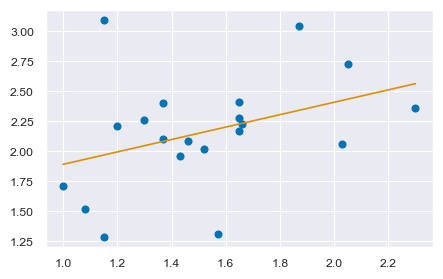

In [72]:
plt.plot(x, y, "o")
plt.plot(x, a + b * x)


## Residui

Considero ora i residui. Inizio a calcolare i valori predetti $\hat{y}$.

In [73]:
y_hat = a + b * x
y_hat


0     1.891965
1     1.933270
2     1.969413
3     1.969413
4     1.995229
5     2.046861
6     2.083003
7     2.083003
8     2.113982
9     2.129472
10    2.160451
11    2.186267
12    2.227573
13    2.227573
14    2.227573
15    2.232736
16    2.341163
17    2.423774
18    2.434101
19    2.563181
Name: consumers, dtype: float64

Rappresento i valori $\hat{y}$ con dei quadrati rossi nel grafico che riporta la retta di regressione.

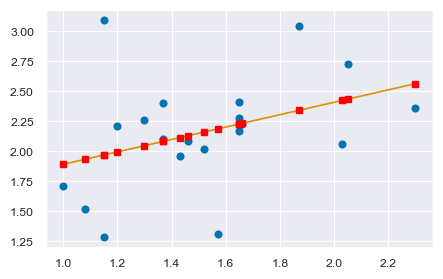

In [74]:
plt.plot(x, y, "o")
plt.plot(x, a + b * x)
plt.plot(x, y_hat, "s", color="red")


Calcolo i residui.

In [75]:
e = y - y_hat
e


0    -0.181965
1    -0.413270
2    -0.679413
3     1.120587
4     0.214771
5     0.213139
6     0.316997
7     0.016997
8    -0.153982
9    -0.039472
10   -0.140451
11   -0.876267
12   -0.057573
13    0.052427
14    0.182427
15   -0.002736
16    0.698837
17   -0.363774
18    0.295899
19   -0.203181
dtype: float64

Controllo che $\sum_i(e_i) = 0$.

In [76]:
sum(e)


3.1086244689504383e-15

I residui corrispondono ai segmenti verticali che, nel diagramma a dispersione, collegano i punti al valore predetto sulla retta di regressione.

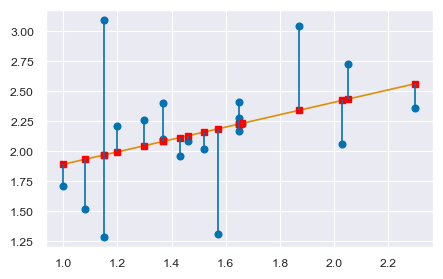

In [78]:
plt.plot(x, y, "o")
plt.plot(x, a + b * x)
plt.plot(x, y_hat, "s", color="red")

plt.vlines(x, y, y - e)


## Correlazione e pendenza della retta di regressione

Se standardizziamo $X$ e $Y$, la pendenza della retta di regressione

$$
b = \frac{S_{x,y}}{Var_{x}}
$$

diventa identica alla correlazione tra le due variabili in quanto, per definizione, la correlazione è la covarianza dei dati standardizzati e, nuovamente per definizione, la varianza di una variabile standardizzata è uguale a 1.

Inoltre, quando i dati sono standardizzati, $a$ = 0, in quanto 

$$
a = \bar{y} - b \cdot \bar{x}.
$$

Per ottenere una dimostrazione numerica, creaimo un diagramma a dispersione con le variabili standardizzate, a cui aggiungeremo la retta di regressione con pendenza uguale a $r$ e intercetta 0.

In [81]:
zx = (x - np.mean(x)) / np.std(x)
zy = (y - np.mean(y)) / np.std(y)


In [86]:
r_xy = np.corrcoef(x, y)[0, 1]
r_xy


0.3756561199682136

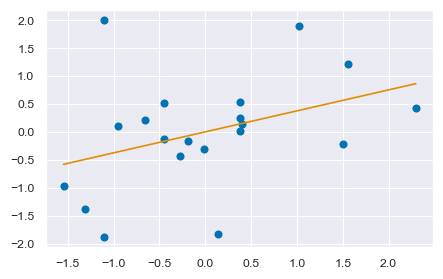

In [87]:
plt.plot(zx, zy, "o")
plt.plot(zx, 0 + r_xy * zx)


## Bontà di adattamento

### Scomposizione della devianza

I modelli lineari sono caratterizzati da una scomposizione della devianza totale

$$
DEV_{\text{tot}} = \sum{}
$$

In [90]:
ss_tot = np.sum((y - np.mean(y)) ** 2)
ss_tot


4.325719999999999

In [93]:
ss_reg = np.sum((y_hat - np.mean(y)) ** 2)
ss_reg


0.6104348806456406

In [94]:
ss_err = np.sum((y - y_hat) ** 2)
ss_err


3.7152851193543586

In [95]:
ss_reg + ss_err


4.325719999999999

In [96]:
r2 = ss_reg / ss_tot
r2


0.14111752046957288

In [97]:
1 - ss_err / ss_tot


0.1411175204695727

Svolgo ora i calcoli con Statsmodels. Nella funzione `OLS()` la variabile dipendente è `y` mentre la variabile indipendente deve essere una matrice che contiene, come prima colonna, il valore `1` (necessari per definie l'intercetta) e, come seconda colonna, i valori della variabile `x`.

In [99]:
X = sm.add_constant(x)
X.head()


,const,consumers
0,1.0,1.00
1,1.0,1.08
2,1.0,1.15
3,1.0,1.15
4,1.0,1.20


Definisco il modello.

In [104]:
mod = sm.OLS(y, X)


Adatto il modello ai dati.

In [106]:
res = mod.fit()


Esamino i risultati ottenuti.

In [107]:
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  acres   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.957
Date:                Sat, 04 Feb 2023   Prob (F-statistic):              0.103
Time:                        10:13:45   Log-Likelihood:                -11.546
No. Observations:                  20   AIC:                             27.09
Df Residuals:                      18   BIC:                             29.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3756      0.468      2.937      0.009       0.392       2.360
consumers      0.5163      0.300      1.720      0.103      -0.114       1.147
==============================================================================
Omnibus:                        3.112   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.322
Skew:                           0.441   Prob(JB):                        0.516
Kurtosis:                       3.900   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- `R-squared` è il coefficiente di determinazione.
- `const` è il valore dell'intercetta. 
- `consumers` è la pendenza della retta di regressione.
- `std err` riflette il livello di accuratezza nella stima dei coefficienti. Più basso è l'errore standard, più alto è il livello di precisione.
- `P >|t|` è il valore p. Nell'approccio frequentista, un valore p inferiore a 0.05 è considerato statisticamente significativo.
- L'intervallo di confidenza `[0.025 0.975]` è l'intervallo frequentista calcolato sui dati del campione. Si interpreta dicendo che questo intervallo è stato calcolato con una procedura la quale, se venisse ripetuta sui dati di infiniti campioni indipendenti, produrrebbe degli intervalli che, nel 95% di casi, conterrebbero il "vero" valore del parametro.


L'errore standard della regressione è la deviazione standard dei residui calcolata con l'appropriato numero di gradi di libertà.  Nel caso della regressione bivariata, i gradi di libertà sono $n-2$, dove $n$ è il numero di osservazioni. Si dice che si "perdono" due gradi di libertà a causa del fatto che abbiamo stimato due coefficienti: $a$ e $b$:

$$
s_e = \sqrt{\frac{\sum_i e^2}{n - 2}}.
$$

L'errore standard della regressione ci fornisce una misura del "residuo medio".

In [108]:
np.sqrt(np.sum(e**2) / (len(x) - 2))


0.45431787203787166

Nel caso presente, il residuo "medio" in valore assoluto è

In [109]:
np.mean(np.abs(e))

0.31120830458289295

## Inferenza

Dal punto di vista frequentista, l'inferenza si sviluppa nei termini delle statistiche $t$ e dei $p$ valori che vengono riportati in output da vari software come, per esempio, Statsmodels. I test statistici frequentisti sono basati su diversi teoremi che, in questo insegnamento, non verranno presentati. Affronteremo invece il problema dell'inferenza sul modello di regressione dal punto di vista bayesiano, che consente una trattazione molto più semplice di questo argomento.

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor